In [22]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np   
from scipy.integrate import odeint

R=8.3145        ##Joules/mole
G=6.674e-11     ## m^3/(kg*s^2)
X=0.64
Y=0.34
Z=0.02
X_CNO=0.015
Kb=1.3e-23
mass_hydrogen=1.66e-27
kappa=0.03
epsi_pp=1.08e-12   ## W*m^3/kg^2
epsi_CNO=8.24e-31
c=3e8           ##speed of light m/s
M_sun=2.0e30  
L_sun=3.8e26
R_sun=7.0e8
a=7.5e-16
mu=1.0/(2.0*X+(3.0/4.0)*Y+(1.0/2.0)*Z)


def rho(y):
    Mr,P,Lr,T=y
    return (P-(a*np.power(T,4.0)/3.0))*(mu*mass_hydrogen)/(Kb*T)

def epsi(y):
    Mr,P,Lr,T=y
    epsi_1=epsi_pp*rho(y)*np.power(X,2.0)*np.power((T/10**6),4.0)
    epsi_2=epsi_CNO*rho(y)*X*X_CNO*(np.power((T/10**6),19.9))
    return epsi_1+epsi_2

def dM_dr(y,r):
    Mr,P,Lr,T=y
    dMdr=4.0*np.pi*np.power(r,2.0)*rho(y)
    return dMdr

def dP_dr(y,r):
    Mr,P,Lr,T=y
    dPdr=-G*Mr*rho(y)/np.power(r,2.0)
    return dPdr

def dL_dr(y,r):
    Mr,P,Lr,T=y
    dLdr=4.0*np.pi*np.power(r,2)*rho(y)*epsi(y)
    return dLdr

def dT_dr(y,r):
    Mr,P,Lr,T=y
    dTdr=-(3.0/(4.0*a*c))*(kappa*rho(y)/np.power(T,3.0))*(Lr/(4.0*np.pi*np.power(r,2.0)))
    return dTdr


def Mother_function(y,r):
    Mr,P,Lr,T=y
    derivs = [dM_dr(y,r), dP_dr(y,r) , dL_dr(y,r) , dT_dr(y,r)]
    return derivs

##  initial conditions at r=0
M0=0
P0=2.3e16   # kg/(m*s^2)
L0=0
T0=1.57e7   # Kelvin
  


y0=[M0, P0, L0, T0]

r=np.linspace(0.1,R_sun,100)

solution=odeint(Mother_function,y0,r)

rho_results = [[rho(solution[y]) for x in range(1)] for y in range(100)]
rho_array = np.array(rho_results)

print solution




Populating the interactive namespace from numpy and matplotlib
[[  0.00000000e+00   2.30000000e+16   0.00000000e+00   1.57000000e+07]
 [  1.78771043e+26   2.28979885e+16   6.85370859e+23   1.56879048e+07]
 [  1.42074881e+27   2.25955274e+16   5.36369995e+24   1.56522473e+07]
 [  4.74261214e+27   2.21031209e+16   1.74629760e+25   1.55948463e+07]
 [  1.10706503e+28   2.14375657e+16   3.94146816e+25   1.55185253e+07]
 [  2.12022389e+28   2.06209303e+16   7.24387759e+25   1.54268405e+07]
 [  3.57752213e+28   1.96792218e+16   1.16555646e+26   1.53237643e+07]
 [  5.52473986e+28   1.86408442e+16   1.70775434e+26   1.52133687e+07]
 [  7.98875970e+28   1.75349803e+16   2.33387063e+26   1.50995429e+07]
 [  1.09778716e+29   1.63900435e+16   3.02271884e+26   1.49857692e+07]
 [  1.44831903e+29   1.52323356e+16   3.75186865e+26   1.48749713e+07]
 [  1.84809827e+29   1.40850146e+16   4.49986523e+26   1.47694342e+07]
 [  2.29356151e+29   1.29674312e+16   5.24773361e+26   1.46707932e+07]
 [  2.78027919

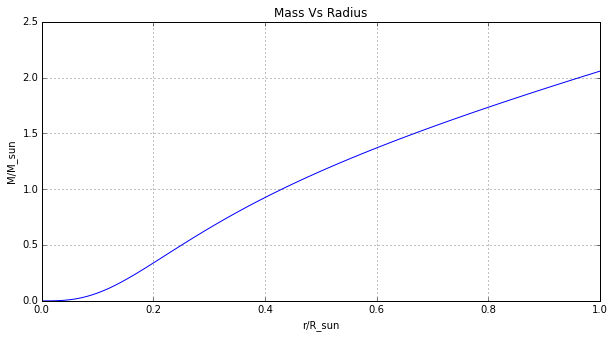

In [66]:
plt.figure(figsize=(10,5))
plt.plot(r/R_sun, solution[:, 0]/M_sun, 'b')
plt.xlabel('r/R_sun')
plt.ylabel('M/M_sun')
plt.title('Mass Vs Radius')
plt.grid(True)
plt.show()



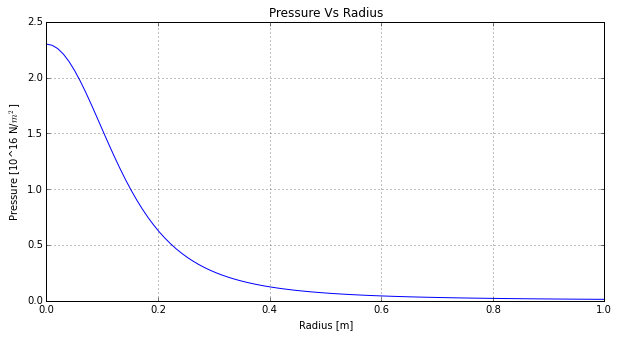

In [65]:
plt.figure(figsize=(10,5))
plt.plot(r/R_sun, solution[:, 1]/(10**16), 'b')
plt.xlabel('Radius [m]')
plt.ylabel('Pressure [10^16 N/$m^2$]')
plt.title('Pressure Vs Radius')
plt.grid(True)
plt.show()



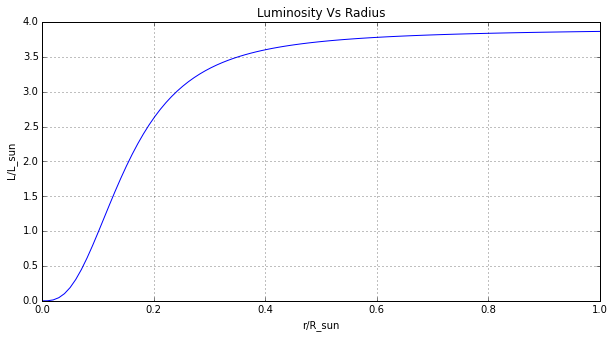

In [31]:
plt.figure(figsize=(10,5))
plt.plot(r/R_sun, solution[:, 2]/L_sun, 'b', label='Luminosity')

plt.xlabel('r/R_sun')
plt.ylabel('L/L_sun')
plt.title('Luminosity Vs Radius')
plt.grid(True)
plt.show()



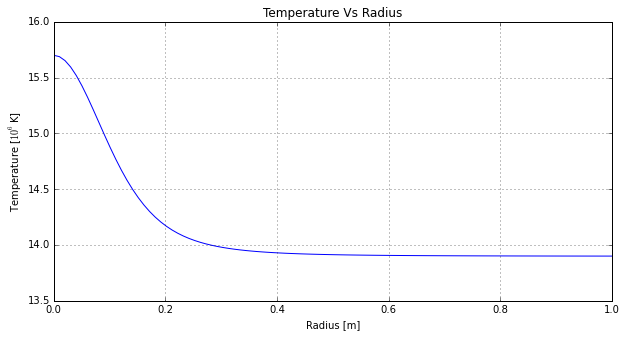

In [56]:
plt.figure(figsize=(10,5))
plt.plot(r/R_sun, solution[:, 3]/(10**6), 'b', label='Luminosity')
plt.xlabel('Radius [m]')
plt.ylabel('Temperature [$10^6$K]')
plt.title('Temperature Vs Radius')
plt.grid(True)
plt.show()


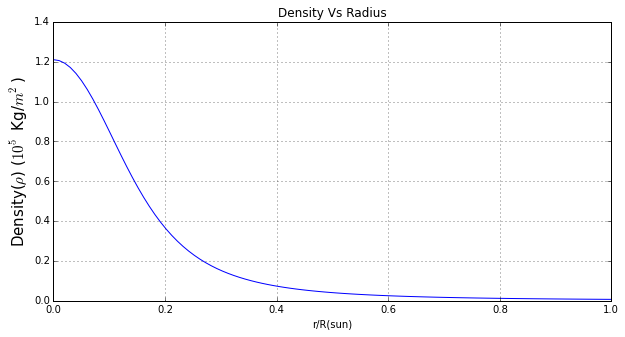

In [67]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.title('Density Vs Radius')
ax1.plot(r/R_sun, rho_array/10**5, 'b')
ax1.set_xlabel('r/R(sun)')
ax1.set_ylabel(r'Density($\rho$) ($10^5$ Kg/$m^2$)',fontsize=15 )
plt.grid(True)

In [ ]:
# Part (i)

# My plots look very simular to the plots in figure 1 in the assignment.
# However the max and min values are off. 
# This is because I used a constant value for Kappa
# I was having too much trouble runnning my code with a kappa function so chose to leave it as a single value.